# Analyze DataSets

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [26]:
def create_dataframe(dataset_path, sets):
        
    number_of_calsses = len(os.listdir(dataset_path+"train/"))
    classes_names = os.listdir(dataset_path+"train/")
    df = pd.DataFrame({'classes':classes_names})
    
    for item in sets:
        if item == 'test_new':
            column = "test"
        elif item == 'valid_new':
            column = "valid"
        else:
            column = item
            
        df[column+"_images"] = [len(os.listdir(dataset_path+item+"/"+category)) for category in os.listdir(dataset_path+item+"/") ]                      

    
    return df

In [31]:
def compute_set_percentage(df):
    sets = ["train", "valid", "test"]
    total_dataset = df["train_images"].sum() + df["valid_images"].sum() +df["test_images"].sum()
    return [ round(df[item+"_images"].sum()/total_dataset * 100,2) for item in sets ]

def compute_no_validation_data(df):
    
    no_valid_df = df[( df.train_images != 0) & (df.valid_images == 0) ]
    number_classes_no_valid_data = len(no_valid_df)
    classes_no_valid_data = list(no_valid_df["classes"])
    print("There are: "+ str(number_classes_no_valid_data) +" classes not represented in the validation set")
    print("\nThose classes are: "+str(classes_no_valid_data))
    
    return number_classes_no_valid_data,classes_no_valid_data

def compute_no_train_but_test(df):
    short_df = df[( df.train_images == 0) & (df.test_images != 0) ]
    number_classes_no_train_data=len(short_df)
    classes_no_train_data = list(short_df["classes"])
    print("There are: "+ str(number_classes_no_train_data) +" classes with no training data but test set")
    print("\nThose classes are: "+str(classes_no_train_data))
          
    return number_classes_no_train_data, classes_no_train_data

def compute_no_train_but_valid(df):
    short_df = df[( df.train_images == 0) & (df.valid_images != 0) ]
    number_classes_no_train_data=len(short_df)
    classes_no_train_data = list(short_df["classes"])
    print("There are: "+ str(number_classes_no_train_data) +" classes with no training data but valid set")
    print("\nThose classes are: "+str(classes_no_train_data))
          
    return number_classes_no_train_data, classes_no_train_data

def no_data_in_dataset(df):
    short_df = df[(df.train_images == 0) & (df.valid_images == 0) & (df.test_images != 0) ]
    number_classes_no_data=len(short_df)
    classes_no_data = list(short_df["classes"])
    print("There are: "+ str(number_classes_no_data) +" classes with no data")
    print("\nThose classes are: "+str(classes_no_data))
          
    return number_classes_no_data, classes_no_data

## TT100K_trafficSigns

In [35]:
dataset_path = "dataset/classificator/TT100K_trafficSigns/"
sets = ["train", "valid", "test"]
df = create_dataframe(dataset_path, sets)

In [52]:
df.to_csv("tt100k_complete.csv")

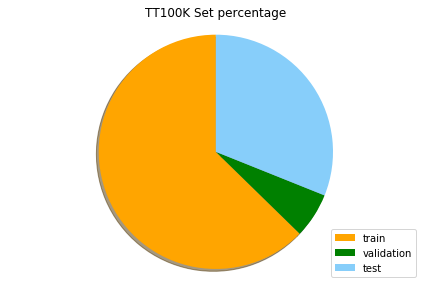

In [48]:
percentage = compute_set_percentage(df)

labels = ["train","validation", "test"]
colors = ['orange', 'green', 'lightskyblue']
explode = (0.005, 0.005, 0.005)  

patches, texts = plt.pie(percentage, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
#plt.pie(percentage, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.title("TT100K Set percentage")
plt.axis('equal')
plt.show()

## Number and What Classes have no Validation Set but have Train data

In [37]:
numberV, classesV = compute_no_validation_data(df)

There are: 44 classes not represented in the validation set

Those classes are: ['i1', 'i11', 'il110', 'il50', 'il70', 'p13', 'p15', 'p18', 'p20', 'p21', 'p24', 'p27', 'p4', 'p6', 'p8', 'pa12', 'pa8', 'ph1.5', 'ph2.1', 'ph2.9', 'ph3.2', 'ph4', 'ph4.5', 'pl70', 'pm20', 'pm30', 'pm35', 'pm55', 'pr10', 'pr100', 'pr40', 'pw2', 'pw2.5', 'pw3', 'pw3.2', 'pw3.5', 'pw4', 'pw4.2', 'pw4.5', 'w12', 'w35', 'w5', 'w55', 'wo']


## Number and What Classes have no Train Set but have Validation data

In [38]:
numberV, classesV = compute_no_train_but_valid(df)

There are: 24 classes with no training data but valid set

Those classes are: ['i15', 'p7', 'pc', 'ph2.6', 'ph3.3', 'ph4.4', 'ph5.5', 'pl4', 'pl65', 'pm1.5', 'pm25', 'pm46', 'pn40', 'w1', 'w24', 'w26', 'w31', 'w43', 'w44', 'w48', 'w49', 'w50', 'w60', 'w62']


## Number and What Classes have no Training Data but have Test Data

In [39]:
numberT, classesT = compute_no_train_but_test(df)

There are: 11 classes with no training data but test set

Those classes are: ['i15', 'ph3.8', 'ph5.5', 'pl3', 'pm2.5', 'pr45', 'w2', 'w24', 'w28', 'w43', 'w56']


## Classes with no data in either class

In [102]:
number, classes = no_data_in_dataset(df)

There are: 7 classes with no data

Those classes are: ['ph3.8', 'pl3', 'pm2.5', 'pr45', 'w2', 'w28', 'w56']


## Classes Inicials: 45

In [55]:
config_file = ['i1','i4','i5','il100','il60','il80','io','ip','p10','p11','p12','p19','p23','p26','p27','p3','p5','p6','pg','ph4.5','ph4','ph5','pl100','pl120','pl20','pl30','pl40','pl50','pl5','pl60','pl70','pl80','pm20','pm30','pm55','pne','pn','po','pr40','w13','w32','w55','w57','w59','wo']
classes_incials_df = df[df.classes.isin(config_file)]


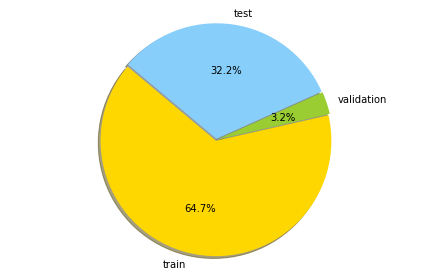

In [57]:
percentage = compute_set_percentage(classes_incials_df)

labels = ["train","validation", "test"]
colors = ['gold', 'yellowgreen', 'lightskyblue']
explode = (0.009, 0.009, 0.009)  
plt.pie(percentage, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.show()

In [58]:
classes_incials_df.to_csv("init_tt100k.csv")

In [118]:
short_df = df[(df.train_images > 0) & (df.valid_images > 0) & (df.test_images > 0) ]
classes_always_data = list(short_df.classes)

## Agrupation by classes to analyse results

In [19]:
classes_aggrupation_map = {'info': 0,'pr_general': 1, 'pr_weigh':3, 'pr_weigh2':4, 'pr_width':5, 'pr_circulation':6, 'attention':7, 'pr_height':8, 'pr_limit_velocity':9, 'pr_entry':10,'pr_park':11, 'vel_restrict':12, 'warn':13, 'china_stop':14}


In [41]:
aggrup = {'info':[], 
          'pr_general': [], 
          'pr_weigh':[], 
          'pr_weigh2':[],
          'pr_width':[], 
          'pr_circulation':[], 
          'attention':[],
          'pr_height':[], 
          'pr_limit_velocity':[],
          'pr_entry':[],
          'pr_park':[], 
          'vel_restrict':[], 
          'warn':[], 
          'china_stop':[]}


## Group traffic signs per type

In [42]:
for item in df.classes:
    if item.startswith("i"):
        aggrup["info"].append(item)
        
    elif item.startswith("w"):
        aggrup["warn"].append(item)
        
    elif item.startswith("pa"):
        aggrup["pr_weigh"].append(item)
        
    elif item.startswith("pb"):
        aggrup["pr_circulation"].append(item)
        
    elif item.startswith("pg"):
        aggrup["attention"].append(item)
        
    elif item.startswith("ph"):
        aggrup["pr_height"].append(item)
        
    elif item.startswith("pl"):
        aggrup["pr_limit_velocity"].append(item)
        
    elif item.startswith("pne"):
        aggrup["pr_entry"].append(item)
        
    elif item.startswith("pn"):
        aggrup["pr_park"].append(item)
        
    elif item.startswith("pm"):
        aggrup["pr_weigh2"].append(item)
        
    elif item.startswith("pw"):
        aggrup["pr_width"].append(item)
        
    elif item.startswith("pr"):
        aggrup["vel_restrict"].append(item)
        
    elif item.startswith("ps"):
        aggrup["china_stop"].append(item)    
    else:
        aggrup["pr_general"].append(item)

In [89]:
def save_images_per_set(df, dataset, aggrup):
    df_aggrup = df[df.classes.isin(aggrup)].sum()
    return df_aggrup[dataset+"_images"]
    


In [91]:
df_image_class = pd.DataFrame({'aggrupation': aggrup})

In [95]:
df_image_class['train'] = [save_images_per_set(df, 'train', lista) for lista in df_image_class.aggrupation]
df_image_class['valid'] = [save_images_per_set(df, 'valid', lista) for lista in df_image_class.aggrupation]
df_image_class['test'] = [save_images_per_set(df, 'test', lista) for lista in df_image_class.aggrupation]
df_image_class.to_csv('TT100k_gruping.csv')

## Belgium Valid and Test Different

In [27]:
dataset_path = "dataset/classificator/BelgiumTSC/"
sets = ["train", "valid_new", "test_new"]
df = create_dataframe(dataset_path, sets)
df.columns.values

array(['classes', 'train_images', 'valid_images', 'test_images'],
      dtype=object)

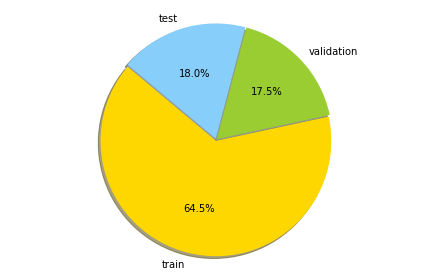

In [28]:
percentage = compute_set_percentage(df)

labels = ["train","validation", "test"]
colors = ['gold', 'yellowgreen', 'lightskyblue']
explode = (0.009, 0.009, 0.009)  
plt.pie(percentage, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.show()

In [30]:
df.to_csv("belgium_split.csv")


## BelgiumTSC NON SPLIT


In [170]:
dataset_path = "dataset/classificator/BelgiumTSC/"
sets = ["train", "valid", "test"]
df = create_dataframe(dataset_path, sets)

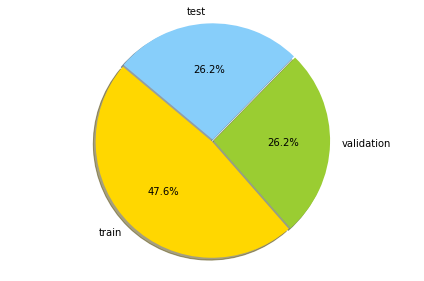

In [171]:
percentage = compute_set_percentage(df)

labels = ["train","validation", "test"]
colors = ['gold', 'yellowgreen', 'lightskyblue']
explode = (0.009, 0.009, 0.009)  
plt.pie(percentage, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.show()

## Number and What Classes have no Validation Set but have Train data






In [152]:
numberV, classesV = compute_no_validation_data(df)

There are: 9 classes not represented in the validation set

Those classes are: ['00009', '00011', '00015', '00026', '00033', '00036', '00048', '00050', '00052']


## Number and What Classes have no Training Data but have Test Data


In [153]:
numberT, classesT = compute_no_train_but_test(df)

There are: 0 classes with no training data but test set

Those classes are: []


In [174]:
total_train = df.train_images.sum()
total_test = df.test_images.sum()
total_val = df.valid_images.sum()

In [175]:
print ("Train: ", total_train, "\n Test: ", total_test ,"\n Valid: ", total_val)

Train:  4575 
 Test:  2520 
 Valid:  2520


## KITTI

In [157]:
dataset_path = "dataset/classificator/KITTI/"
sets = ["train", "valid"]
df = create_dataframe(dataset_path, sets)

In [158]:
a = np.zeros(8)
a = list(a)
df["test_images"] = a
df

,classes,train_images,valid_images,test_images
0,background,28189,7150,0.0
1,Car,23076,5666,0.0
2,Cyclist,1337,290,0.0
3,Pedestrian,3637,850,0.0
4,Person_sitting,173,49,0.0
5,Tram,405,106,0.0
6,Truck,876,218,0.0
7,Van,2367,547,0.0


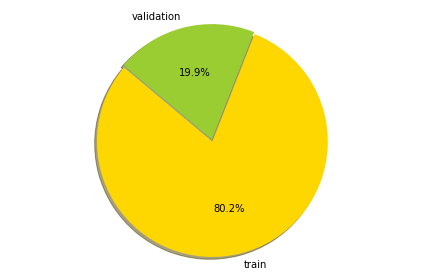

In [159]:
percentage = compute_set_percentage(df)
#percentage.append(0)

labels = ["train","validation"]
colors = ['gold', 'yellowgreen']
explode = (0.009, 0.009)  
plt.pie(percentage, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.show()

In [160]:
df.to_csv('kitti.csv')

In [166]:
import os

In [169]:
sorted(os.listdir("dataset/classificator/BelgiumTSC/test/"))

['00000',
 '00001',
 '00002',
 '00003',
 '00004',
 '00005',
 '00006',
 '00007',
 '00008',
 '00009',
 '00010',
 '00011',
 '00012',
 '00013',
 '00014',
 '00015',
 '00016',
 '00017',
 '00018',
 '00019',
 '00020',
 '00021',
 '00022',
 '00023',
 '00024',
 '00025',
 '00026',
 '00027',
 '00028',
 '00029',
 '00030',
 '00031',
 '00032',
 '00033',
 '00034',
 '00035',
 '00036',
 '00037',
 '00038',
 '00039',
 '00040',
 '00041',
 '00042',
 '00043',
 '00044',
 '00045',
 '00046',
 '00047',
 '00048',
 '00049',
 '00050',
 '00051',
 '00052',
 '00053',
 '00054',
 '00055',
 '00056',
 '00057',
 '00058',
 '00059',
 '00060',
 '00061']